## **Import Library**

In [1]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Check Image Data**

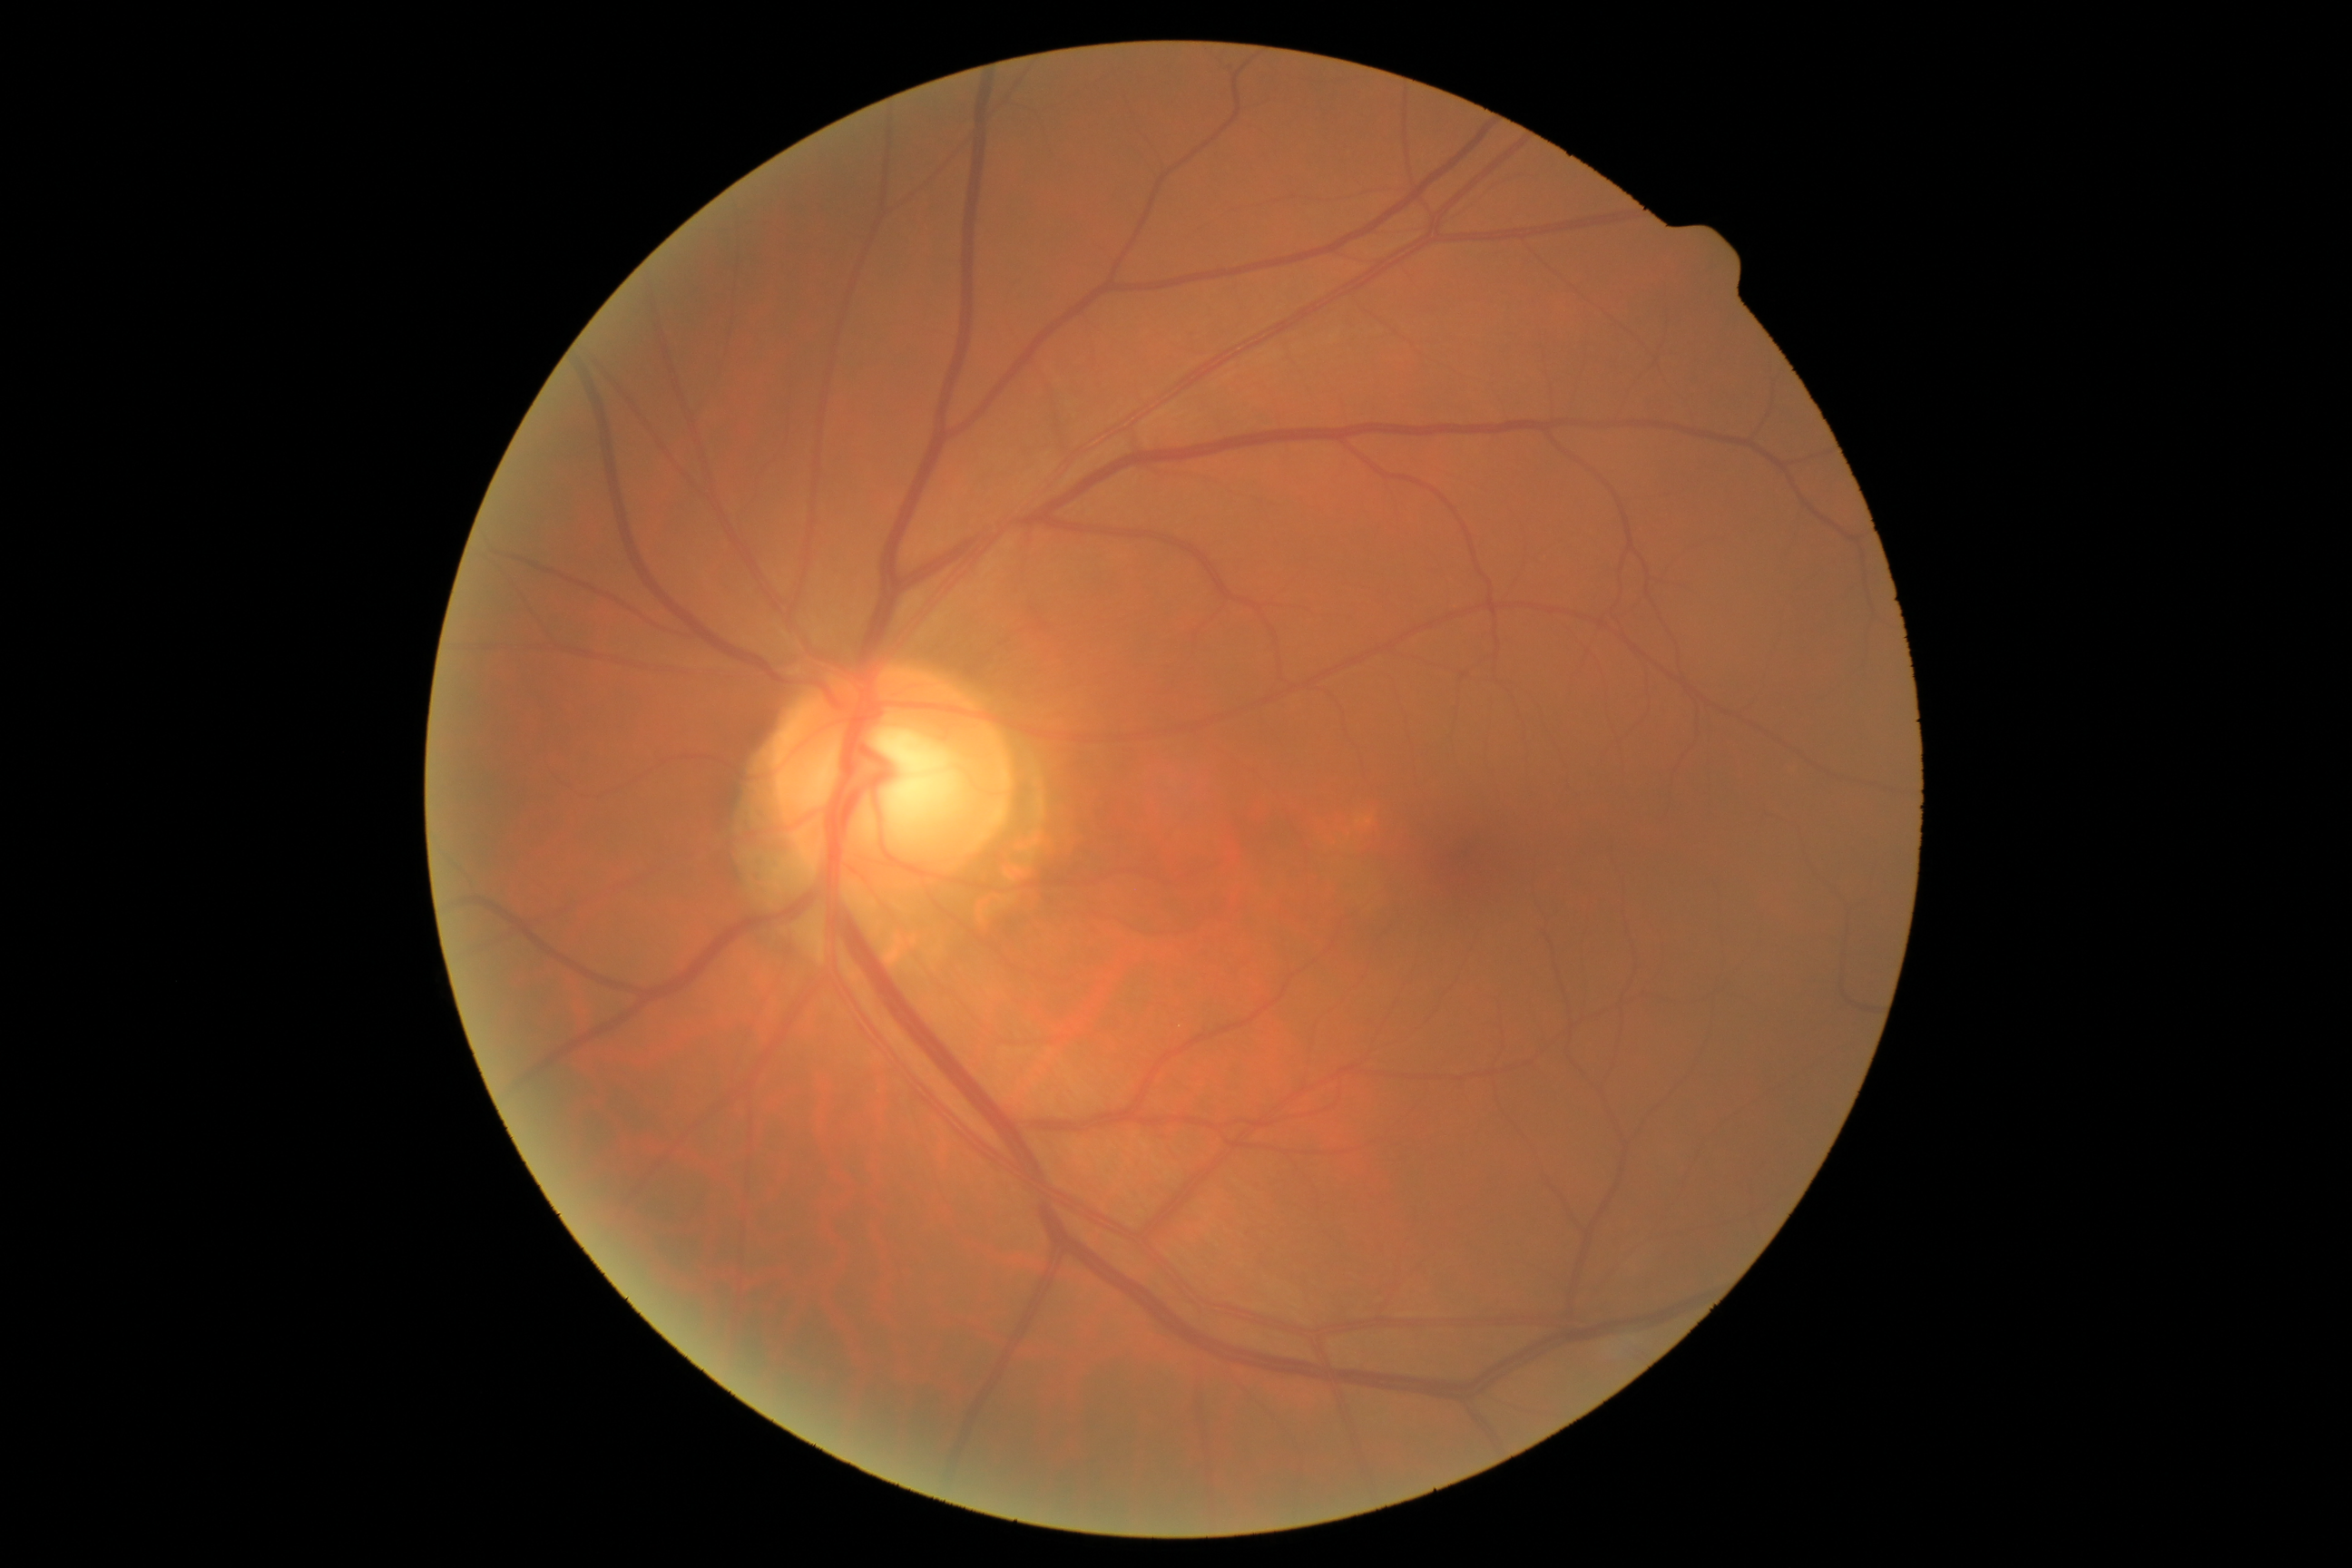

In [2]:
img = Image.open('image_dataset/cataract_001.png')
img

In [3]:
print(img.size)

(2592, 1728)


## **Custom Image Size**

In [4]:
img_directory = 'image_dataset/'
prefix = 'crop_'

dataset = []
gen = ImageDataGenerator()

img_dir = os.listdir(img_directory)
for i, img_name in enumerate(img_dir):
    if (img_name.split('.')[1] == 'png'):
        img = Image.open(img_directory + img_name)
        width, height = img.size
        
        # change image size
        img_ratio = width / height
        new_height = int(width * img_ratio)
        new_width = width		# sesuaikan dengan width size gambar

        img = img.resize((new_height, new_width))

        left = (new_height - new_width) / 2
        top = 0
        right = new_height - left
        bottom = new_width

        img_crop = img.crop((left, top, right, bottom))	# left, top, right, bottom
        
        # resize image
        img_resize = img_crop.resize((224, 224))
        
        target_directory = 'crop_dataset/'
        image_filename = prefix + img_name + '.png'
        
        full_path = os.path.join(target_directory, image_filename)
        img_resize.save(full_path)

## **Check New Image Data**

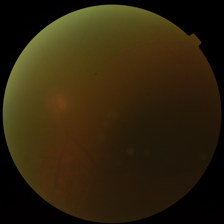

In [5]:
new_img = Image.open(full_path)
new_img

In [6]:
print(new_img.size)

(224, 224)
